### Exploratory Data Analysis For UCI Heart Disease Dataset

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

In [3]:
#Loading the dataset
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Data is already preprocessed

In [4]:
#Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

We can see there are few missing values in ca and thal features

In [6]:
#Checking different values in ca column
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [7]:
#Checking different values in thal column
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [8]:
#Handling missing values by replacing '?' with NaN
df.replace('?', np.nan, inplace=True)

In [9]:
#Handling missing values with mode imputation
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [10]:
#Verifying that there are no missing values left
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [11]:
#displaying statistical summary of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [14]:
#Converting target variable to binary
# 0 -> No heart disease
#1,2,3,4 -> Heart disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
# Target variable distribution
df['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

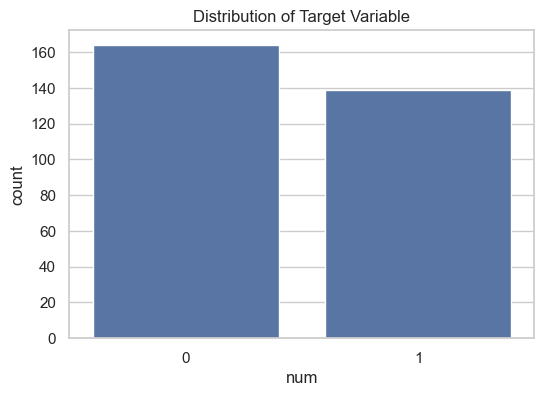

In [15]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [17]:
#Seperating categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

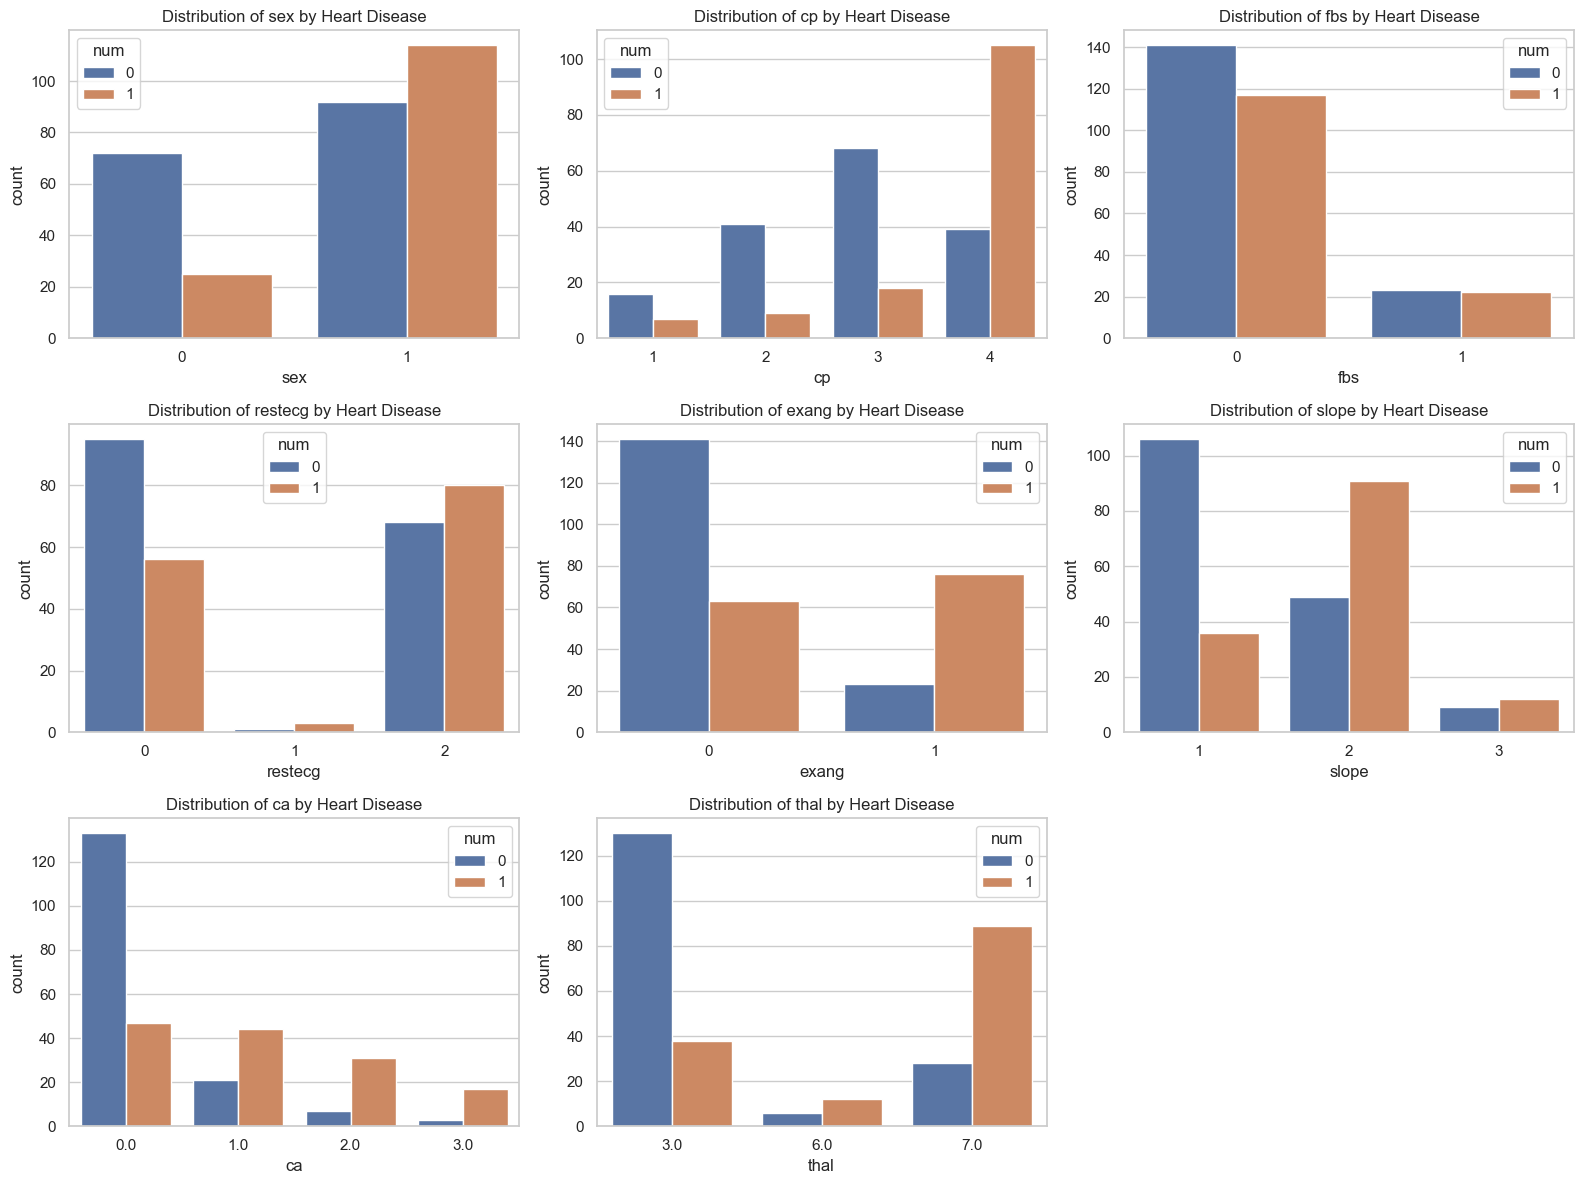

In [19]:
# Bar plots for categorical variables using subplots
plt.figure(figsize=(16, 12))    
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'Distribution of {col} by Heart Disease')
plt.tight_layout()
plt.show()

Insights:
1. Chest pain type (cp) seems to have a significant impact on heart disease presence.
2. Exercise-induced angina (exang) also shows a notable difference between the two groups.

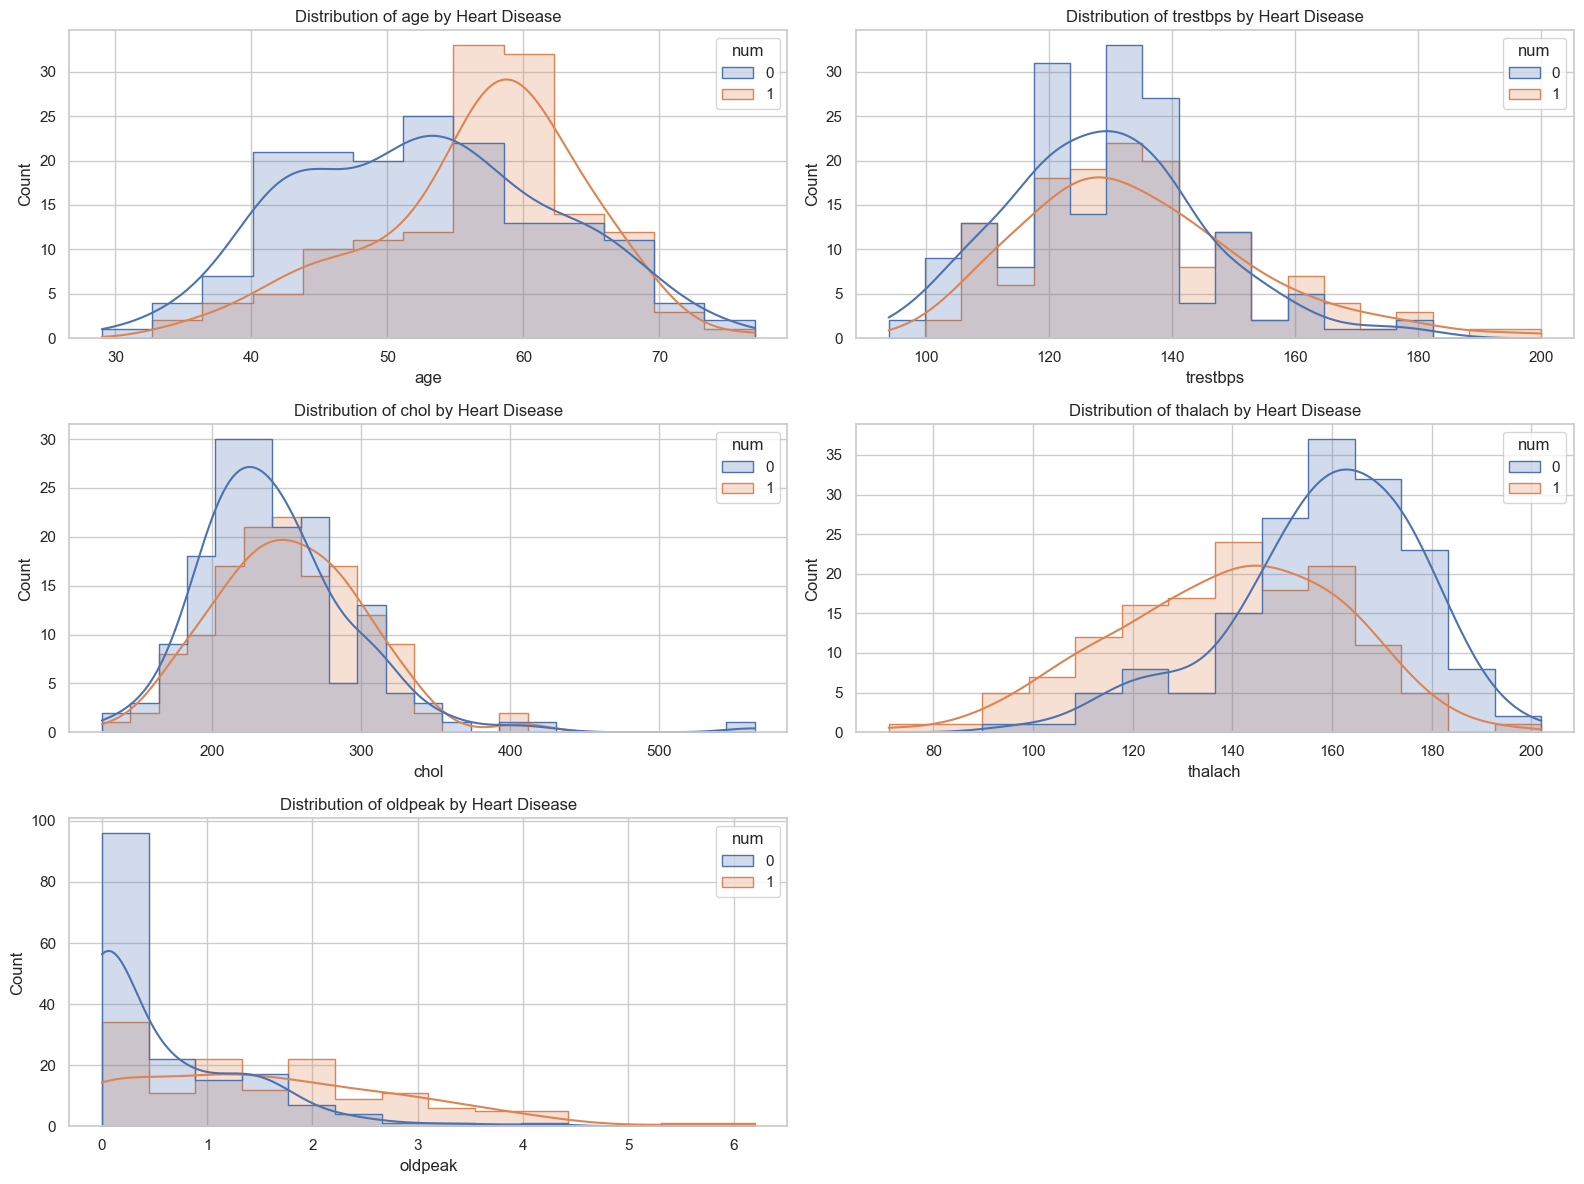

In [20]:
# Histograms for numerical variables using subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue='num', kde=True, element='step')
    plt.title(f'Distribution of {col} by Heart Disease')
plt.tight_layout()
plt.show()

Insights from Histograms:  
1. Age: Higher age groups tend to have a higher prevalence of heart disease.  
2. Trestbps: Elevated resting blood pressure is more common in individuals with heart disease.
3. Chol: Higher cholesterol levels are associated with a greater incidence of heart disease.  

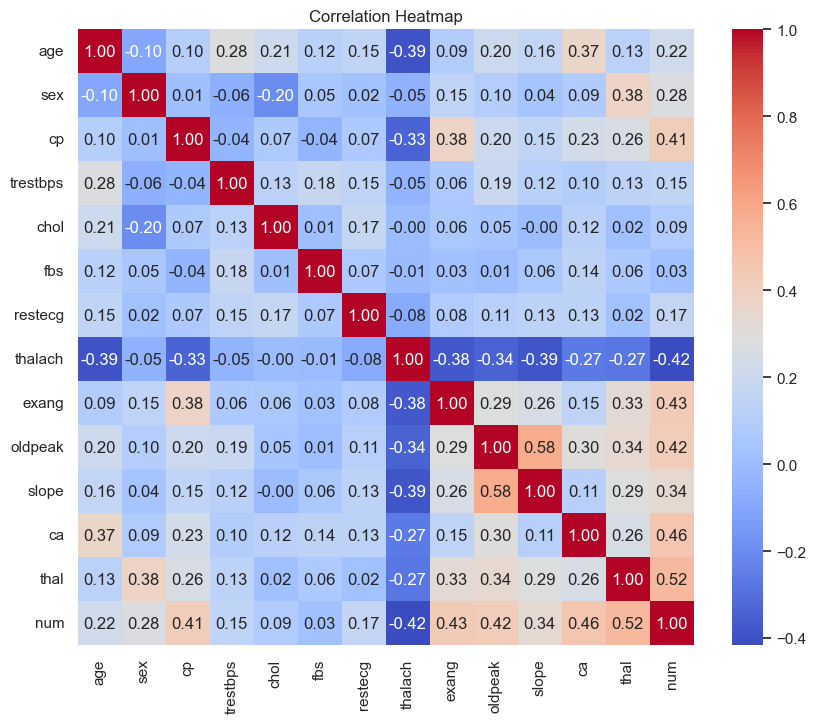

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Insights from Correlation Heatmap

1. Age and Max Heart Rate: There is a moderate negative correlation between age and maximum heart rate, indicating that older individuals tend to have lower maximum heart rates.
2. Chest Pain Type and Heart Disease: The chest pain type shows a positive correlation with heart disease, suggesting that certain types of chest pain are more associated with heart disease.
3. Resting Blood Pressure and Cholesterol: There is a weak positive correlation between resting blood pressure and cholesterol levels, indicating that individuals with higher blood pressure may also have higher cholesterol.
4. ST Depression and Heart Disease: The ST depression induced by exercise relative to rest shows a positive correlation with heart disease, suggesting that higher ST depression values are associated with a greater likelihood of heart disease.  

These insights can help in understanding the relationships between different features and heart disease, which can be useful for further analysis and model building. 


# EDA & Preprocessing summary
1. Loaded the dataset and displayed basic information.
2. Handled missing values in 'ca' and 'thal' columns using mode imputation.
3. Converted the target variable 'num' to a binary format as data provided is multivariate.
4. Visualized the distribution of categorical and numerical features with respect to the target variable.
5. Created a correlation heatmap to understand relationships between features.
6. Categorical features were already in numerical format; no encoding was necessary.

